# LONDON HOUSING MYSTERY
## Objectives


Here’s the mystery we’re going to solve: 
***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.



Of the tools, this challenge should require the application of the following: 
- **pandas**
    - **data ingestion and inspection** 
    - **exploratory data analysis** 
    - **tidying and cleaning** 
    - **transforming DataFrames**
    - **subsetting DataFrames with lists**
    - **filtering DataFrames** 
    - **grouping data**
    - **melting data**
    - **advanced indexing** 
- **matplotlib** 
- **fundamental data types** 
- **dictionaries** 
- **handling dates and times** 
- **function definition**
- **default arguments, variable length, and scope**
- **lambda functions and error handling**

## The Data Science Pipeline

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [4]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [5]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 



***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules. 
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [6]:
properties.shape

(356, 49)

In [7]:
properties.head(3)

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549


**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [8]:
properties_T = properties.T
properties_T.head(3)

,0,1,2,3,4,5,6,7,8,9,...,346,347,348,349,350,351,352,353,354,355
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00
City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,104473.1096,...,879902,848903,793104,808294,828554,822722,821273,836905,837575,766878
Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,51471.61353,...,335579,338839,337801,330252,327835,332832,335878,335562,335345,340664


**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

In [9]:
# changing the index
properties_T = properties_T.reset_index()

In [10]:
properties_T.head(3)

,index,0,1,2,3,4,5,6,7,8,...,346,347,348,349,350,351,352,353,354,355
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,879902,848903,793104,808294,828554,822722,821273,836905,837575,766878
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,335579,338839,337801,330252,327835,332832,335878,335562,335345,340664


In [11]:
properties_T.iloc[0]

index             Unnamed: 0
0                        NaT
1        1995-01-01 00:00:00
2        1995-02-01 00:00:00
3        1995-03-01 00:00:00
                ...         
351      2024-03-01 00:00:00
352      2024-04-01 00:00:00
353      2024-05-01 00:00:00
354      2024-06-01 00:00:00
355      2024-07-01 00:00:00
Name: 0, Length: 357, dtype: object

In [12]:
# Change column name:
properties_T.columns = properties_T.iloc[0]
properties_T.head(3)

,Unnamed: 0,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,879902,848903,793104,808294,828554,822722,821273,836905,837575,766878
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,335579,338839,337801,330252,327835,332832,335878,335562,335345,340664


In [13]:
# droping the first column now:
properties_T = properties_T.drop(0, axis=0)
properties_T.head(3)

,Unnamed: 0,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,879902,848903,793104,808294,828554,822722,821273,836905,837575,766878
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,335579,338839,337801,330252,327835,332832,335878,335562,335345,340664
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,577071,580161,581077,579597,567789,568738,574906,581664,592085,592597


In [14]:
# Renaming 2 columns
properties_T = properties_T.rename(columns= {"Unnamed: 0": "London_Boroughs", pd.NaT: "ID"})
properties_T.head(3)

,London_Boroughs,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,879902,848903,793104,808294,828554,822722,821273,836905,837575,766878
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,335579,338839,337801,330252,327835,332832,335878,335562,335345,340664
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,577071,580161,581077,579597,567789,568738,574906,581664,592085,592597


**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [15]:
# reshaping by melt

properties_T = pd.melt(properties_T, id_vars= ["London_Boroughs", "ID"] )
properties_T.head(10)

,London_Boroughs,ID,0,value
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
5,Bromley,E09000006,1995-01-01,81671.47692
6,Camden,E09000007,1995-01-01,120932.8881
7,Croydon,E09000008,1995-01-01,69158.16225
8,Ealing,E09000009,1995-01-01,79885.89069
9,Enfield,E09000010,1995-01-01,72514.69096


In [17]:
# renaming the new columns:
clean_properties = properties_T.rename(columns = {0: "Month", "value": "Average_Price"})
clean_properties.head(3)

,London_Boroughs,ID,Month,Average_Price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266
2,Barnet,E09000003,1995-01-01,93284.51832


Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [18]:
clean_properties.dtypes

London_Boroughs            object
ID                         object
Month              datetime64[ns]
Average_Price              object
dtype: object

In [19]:
clean_properties["Average_Price"] = pd.to_numeric(clean_properties["Average_Price"])
clean_properties.dtypes

London_Boroughs            object
ID                         object
Month              datetime64[ns]
Average_Price             float64
dtype: object

**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [20]:
clean_properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17040 entries, 0 to 17039
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   London_Boroughs  17040 non-null  object        
 1   ID               15975 non-null  object        
 2   Month            17040 non-null  datetime64[ns]
 3   Average_Price    15975 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 532.6+ KB


In [21]:
clean_properties['London_Boroughs'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'], dtype=object)

In [22]:
clean_properties[clean_properties["London_Boroughs"] == "Unnamed: 34"]

,London_Boroughs,ID,Month,Average_Price
33,Unnamed: 34,NaN,1995-01-01,NaN
81,Unnamed: 34,NaN,1995-02-01,NaN
129,Unnamed: 34,NaN,1995-03-01,NaN
177,Unnamed: 34,NaN,1995-04-01,NaN
225,Unnamed: 34,NaN,1995-05-01,NaN
...,...,...,...,...
16833,Unnamed: 34,NaN,2024-03-01,NaN
16881,Unnamed: 34,NaN,2024-04-01,NaN
16929,Unnamed: 34,NaN,2024-05-01,NaN
16977,Unnamed: 34,NaN,2024-06-01,NaN


In [23]:
(clean_properties["London_Boroughs"] == "Unnamed: 47").unique()

array([False,  True])

In [24]:
clean_properties[clean_properties["London_Boroughs"] == "Unnamed: 47"]

,London_Boroughs,ID,Month,Average_Price
46,Unnamed: 47,NaN,1995-01-01,NaN
94,Unnamed: 47,NaN,1995-02-01,NaN
142,Unnamed: 47,NaN,1995-03-01,NaN
190,Unnamed: 47,NaN,1995-04-01,NaN
238,Unnamed: 47,NaN,1995-05-01,NaN
...,...,...,...,...
16846,Unnamed: 47,NaN,2024-03-01,NaN
16894,Unnamed: 47,NaN,2024-04-01,NaN
16942,Unnamed: 47,NaN,2024-05-01,NaN
16990,Unnamed: 47,NaN,2024-06-01,NaN


In [25]:
# Removing these rows:
clean_properties[clean_properties['ID'].isna()]  # 1065 rows can be dropped

,London_Boroughs,ID,Month,Average_Price
33,Unnamed: 34,NaN,1995-01-01,NaN
36,Unnamed: 37,NaN,1995-01-01,NaN
46,Unnamed: 47,NaN,1995-01-01,NaN
81,Unnamed: 34,NaN,1995-02-01,NaN
84,Unnamed: 37,NaN,1995-02-01,NaN
...,...,...,...,...
16980,Unnamed: 37,NaN,2024-06-01,NaN
16990,Unnamed: 47,NaN,2024-06-01,NaN
17025,Unnamed: 34,NaN,2024-07-01,NaN
17028,Unnamed: 37,NaN,2024-07-01,NaN


In [26]:
NaNFreeDF = clean_properties.dropna()
NaNFreeDF

,London_Boroughs,ID,Month,Average_Price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
...,...,...,...,...
17034,EAST OF ENGLAND,E12000006,2024-07-01,341160.00000
17035,LONDON,E12000007,2024-07-01,520747.00000
17036,SOUTH EAST,E12000008,2024-07-01,381188.00000
17037,SOUTH WEST,E12000009,2024-07-01,320415.00000


In [27]:
clean_properties.count()
NaNFreeDF.count()

London_Boroughs    15975
ID                 15975
Month              15975
Average_Price      15975
dtype: int64

In [28]:
print(clean_properties.shape)
print(NaNFreeDF.shape)

(17040, 4)
(15975, 4)


In [29]:
# Rows that are not in the borough list:
nonBoroughs = ['Inner London', 'Outer London', 
               'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 
               'EAST MIDLANDS', 'WEST MIDLANDS',
              'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 
              'SOUTH WEST', 'England']

In [30]:
NaNFreeDF = NaNFreeDF[~NaNFreeDF['London_Boroughs'].isin(nonBoroughs)]


In [31]:
NaNFreeDF

,London_Boroughs,ID,Month,Average_Price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
...,...,...,...,...
17020,Sutton,E09000029,2024-07-01,423468.00000
17021,Tower Hamlets,E09000030,2024-07-01,452572.00000
17022,Waltham Forest,E09000031,2024-07-01,483613.00000
17023,Wandsworth,E09000032,2024-07-01,631945.00000


In [32]:
# Final DataFrame name assign:
df = NaNFreeDF

In [33]:
df.dtypes

London_Boroughs            object
ID                         object
Month              datetime64[ns]
Average_Price             float64
dtype: object

**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

Text(0, 0.5, 'Prices')

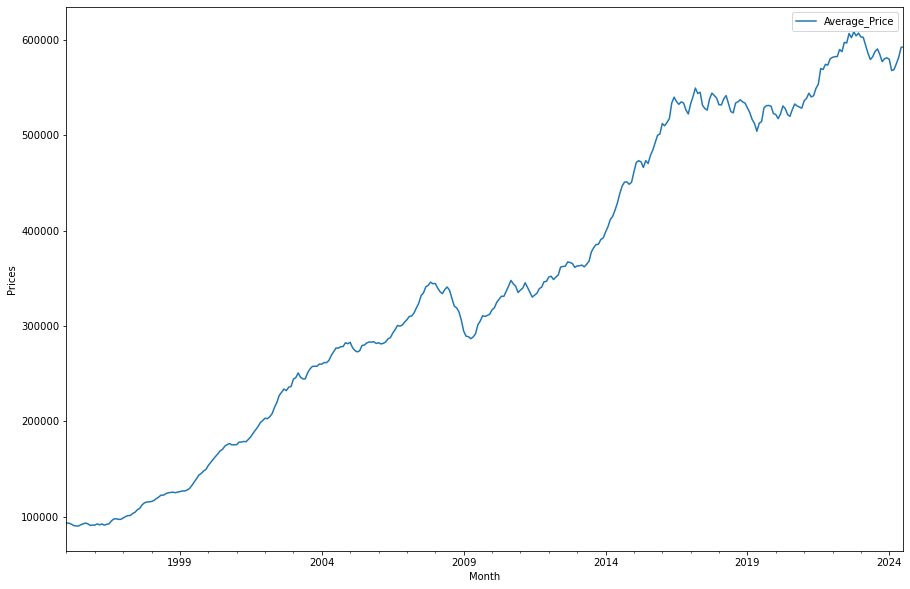

In [34]:
barnet_prices = df[df['London_Boroughs'] == 'Barnet']
ax = barnet_prices.plot(kind ='line', x = 'Month', y = 'Average_Price', figsize = (15, 10))
ax.set_ylabel('Prices')

### ADDITIONAL: The most expensive borough
#### A bar graph to show the average home price per borough.

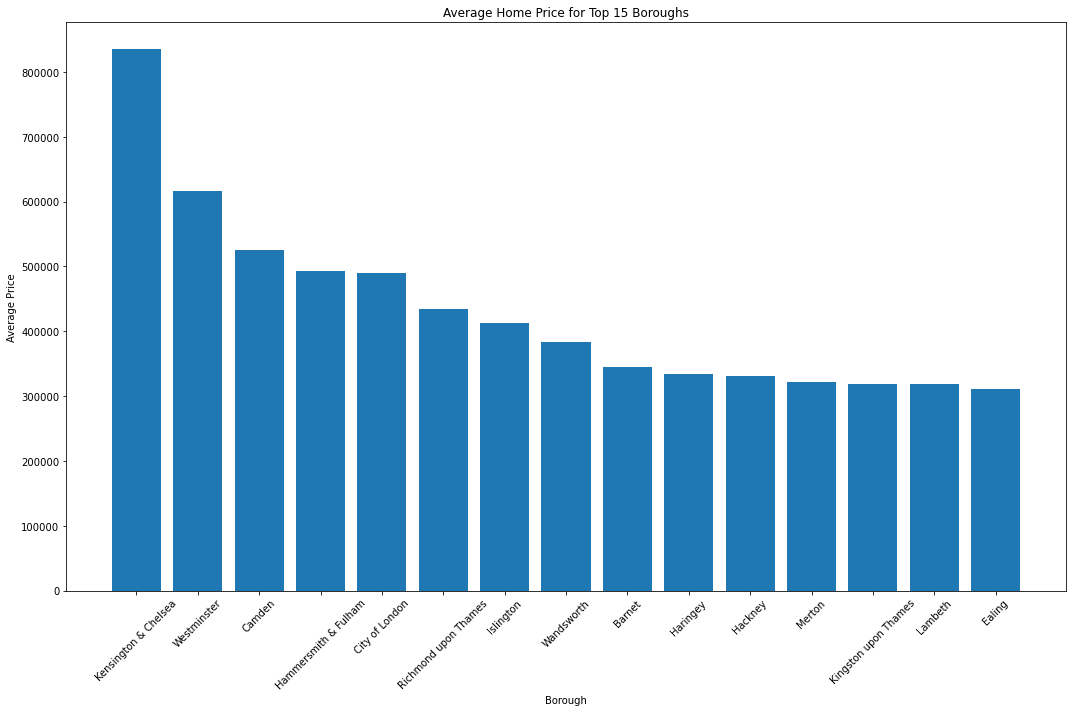

In [37]:
avg_p = df.groupby('London_Boroughs')['Average_Price'].mean().reset_index()
top_15_boroughs = avg_p.sort_values(by='Average_Price', ascending=False).head(15)

plt.figure(figsize=(15, 10))

plt.bar(top_15_boroughs['London_Boroughs'], top_15_boroughs['Average_Price'])
plt.title('Average Home Price for Top 15 Boroughs')
plt.xlabel('Borough')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Prices')

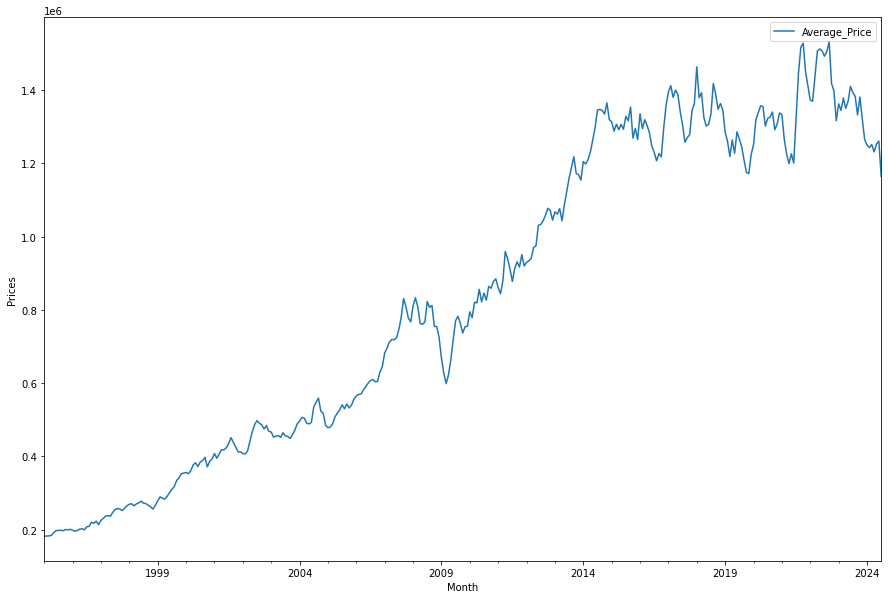

In [53]:
# To check the above viz for 'Kensington & Chelsea'
Ken_chel_prices = df[df['London_Boroughs'] == 'Kensington & Chelsea']
ax = Ken_chel_prices.plot(kind ='line', x = 'Month', y = 'Average_Price', figsize = (15, 10))
ax.set_ylabel('Prices')

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

In [39]:
# Extracting year from the month column
df["Year"] = df['Month'].apply(lambda x: x.year)

/var/folders/k7/lnsdj5j95p580w6_l8hhp2n00000gn/T/ipykernel_5027/423104659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"] = df['Month'].apply(lambda x: x.year)


In [40]:
df.head()

,London_Boroughs,ID,Month,Average_Price,Year
0,City of London,E09000001,1995-01-01,91448.98487,1995
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660,1995
2,Barnet,E09000003,1995-01-01,93284.51832,1995
3,Bexley,E09000004,1995-01-01,64958.09036,1995
4,Brent,E09000005,1995-01-01,71306.56698,1995


In [41]:
df_group = df.groupby(by = ['London_Boroughs', 'Year'])['Average_Price'].mean()
df_group.sample(5)

London_Boroughs  Year
Hackney          2004    217677.077825
Hillingdon       2008    255580.288308
Lambeth          2000    148038.777992
Bexley           1996     65490.417234
Lambeth          2006    250142.554675
Name: Average_Price, dtype: float64

In [42]:
df_group = df_group.reset_index()
df_group.head(5)

,London_Boroughs,Year,Average_Price
0,Barking & Dagenham,1995,51817.969390
1,Barking & Dagenham,1996,51718.192690
2,Barking & Dagenham,1997,55974.262309
3,Barking & Dagenham,1998,60285.821083
4,Barking & Dagenham,1999,65320.934441


**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

In [43]:
def create_price_ratio(d):
    
    y1998 = float(d['Average_Price'][d['Year']==1998].iloc[0])
    y2018 = float(d['Average_Price'][d['Year']==2018].iloc[0])
    
    ratio = [y1998/y2018]
    
    return ratio


In [44]:
# testing the function:
create_price_ratio(df_group[df_group['London_Boroughs'] == 'City of London'])

[0.18858586525674004]

In [45]:
# Doing this for all the boroughs:

price_ratios = {}

for x in df_group['London_Boroughs'].unique():
    
    borough = df_group[df_group['London_Boroughs'] == x]
    price_ratios[x] = create_price_ratio(borough)
    
print(price_ratios)

{'Barking & Dagenham': [0.2042305517789531], 'Barnet': [0.22947444714139667], 'Bexley': [0.23530326956746084], 'Brent': [0.20427076722400112], 'Bromley': [0.24420945118598178], 'Camden': [0.20267350201601636], 'City of London': [0.18858586525674004], 'Croydon': [0.23803943067256167], 'Ealing': [0.23192319294678074], 'Enfield': [0.23459043566245957], 'Greenwich': [0.20992676320748632], 'Hackney': [0.16133361584589345], 'Hammersmith & Fulham': [0.24160777417877788], 'Haringey': [0.19475892515252136], 'Harrow': [0.24635696011145083], 'Havering': [0.2311674243025625], 'Hillingdon': [0.2380791298036054], 'Hounslow': [0.25144117659399684], 'Islington': [0.20653143718863254], 'Kensington & Chelsea': [0.19676616601315003], 'Kingston upon Thames': [0.2341900039910598], 'Lambeth': [0.2016863167694115], 'Lewisham': [0.18355656115206362], 'Merton': [0.21074143727135683], 'Newham': [0.18840708833606376], 'Redbridge': [0.22370414627844573], 'Richmond upon Thames': [0.24982762338287165], 'Southwark':

In [46]:
df_ratios = pd.DataFrame(price_ratios)

In [47]:
df_ratios.head()

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,0.204231,0.229474,0.235303,0.204271,0.244209,0.202674,0.188586,0.238039,0.231923,0.23459,...,0.210741,0.188407,0.223704,0.249828,0.181279,0.242785,0.216135,0.171376,0.210191,0.186821


In [48]:
df_ratios_T = df_ratios.T
df_ratios = df_ratios_T.reset_index()
df_ratios.head()

,index,0
0,Barking & Dagenham,0.204231
1,Barnet,0.229474
2,Bexley,0.235303
3,Brent,0.204271
4,Bromley,0.244209


In [51]:
df_ratios.rename(columns={'index':'London_Borough', 0:'2018'}, inplace=True)

top20 = df_ratios.sort_values(by='2018',ascending=False).head(20)
print(top20)

          London_Borough      2018
17              Hounslow  0.251441
26  Richmond upon Thames  0.249828
14                Harrow  0.246357
4                Bromley  0.244209
28                Sutton  0.242785
12  Hammersmith & Fulham  0.241608
16            Hillingdon  0.238079
7                Croydon  0.238039
2                 Bexley  0.235303
9                Enfield  0.234590
20  Kingston upon Thames  0.234190
8                 Ealing  0.231923
15              Havering  0.231167
1                 Barnet  0.229474
25             Redbridge  0.223704
29         Tower Hamlets  0.216135
23                Merton  0.210741
31            Wandsworth  0.210191
10             Greenwich  0.209927
18             Islington  0.206531


[Text(0, 0, 'Hounslow'),
 Text(1, 0, 'Richmond upon Thames'),
 Text(2, 0, 'Harrow'),
 Text(3, 0, 'Bromley'),
 Text(4, 0, 'Sutton'),
 Text(5, 0, 'Hammersmith & Fulham'),
 Text(6, 0, 'Hillingdon'),
 Text(7, 0, 'Croydon'),
 Text(8, 0, 'Bexley'),
 Text(9, 0, 'Enfield'),
 Text(10, 0, 'Kingston upon Thames'),
 Text(11, 0, 'Ealing'),
 Text(12, 0, 'Havering'),
 Text(13, 0, 'Barnet'),
 Text(14, 0, 'Redbridge'),
 Text(15, 0, 'Tower Hamlets'),
 Text(16, 0, 'Merton'),
 Text(17, 0, 'Wandsworth'),
 Text(18, 0, 'Greenwich'),
 Text(19, 0, 'Islington')]

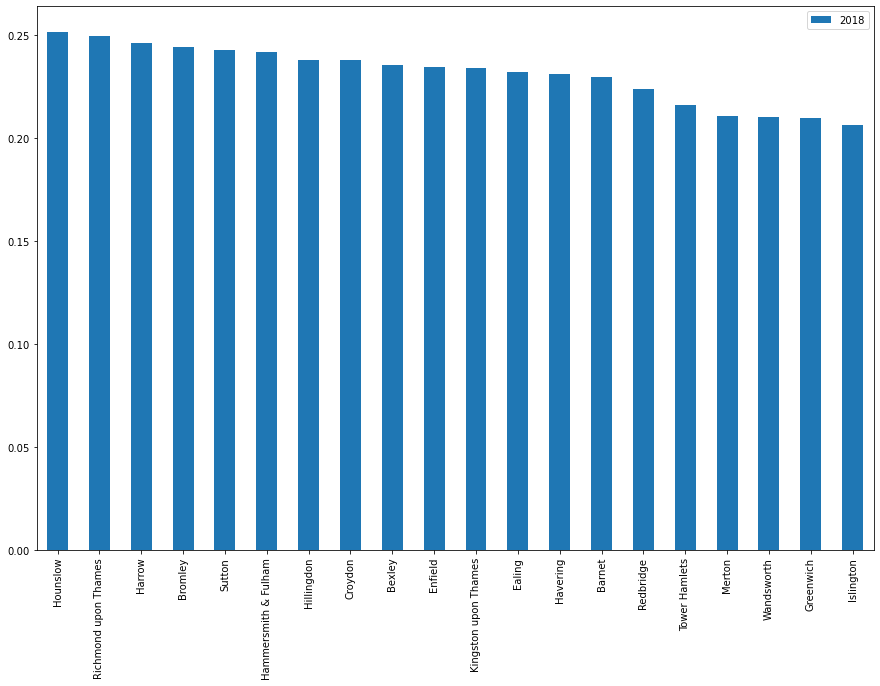

In [52]:
graph = top20[['London_Borough','2018']].plot(kind='bar', figsize = (15,10))

graph.set_xticklabels(top15.London_Borough)

### 4. Conclusion
There are two thinks to see here:
As of 2018, the most expensive borough is the ‘Kensington and Chalsea’, and it’s average price is 200K higher than Westmisnter, which is a considerable difference. 
In the question for which borough has seen the highest difference, Kensington and Chalsea are not even in the top 20. There ‘Hounslow’ tops the charts. 
Looking at the interesting trends, it looks like the average price increase from 1998 to 2018 is almost similar, with a very little difference in the ratios for each boroughs.
